### IMPORTING LIBRARIES

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Reading the CSV File
pp_adult_data = pd.read_csv('preprocessed_dataset/preprocessed_adult_data.csv')
pp_adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,0.048716,2.914651,-1.166321,-0.348632,1.127525,0.944465,-1.482640,-0.257464,0.378911,0.696572,-3.298390,0.000376,-0.079873,0.259423,-0.575395,-0.575395
1,0.907868,1.871363,-1.100265,-0.348632,1.127525,-0.387011,-0.737602,-0.883280,0.378911,0.696572,-0.013178,0.000376,-2.324723,0.259423,-0.575395,-0.575395
2,-0.029388,-0.215213,0.408197,0.176977,-0.444727,-1.718487,-0.240911,-0.257464,0.378911,0.696572,-0.013178,0.000376,-0.079873,0.259423,-0.575395,-0.575395
3,1.142183,-0.215213,0.625629,-2.451069,-1.230853,-0.387011,-0.240911,-0.883280,-2.028559,0.696572,-0.013178,0.000376,-0.079873,0.259423,-0.575395,-0.575395
4,-0.810436,-0.215213,1.807549,-0.348632,1.127525,-0.387011,0.752472,2.245799,-2.028559,-1.435602,-0.013178,0.000376,-0.079873,-5.351064,-0.575395,-0.575395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43886,-0.419912,-0.215213,0.745203,-0.348632,1.127525,0.944465,0.752472,0.994167,0.378911,0.696572,-0.013178,0.000376,-0.079873,0.259423,-0.575395,-0.575395
43887,0.048716,-0.215213,0.405609,-0.348632,1.127525,-1.718487,0.752472,-0.257464,0.378911,-1.435602,-0.013178,0.000376,-0.412443,0.259423,-0.575395,-0.575395
43888,-0.029388,-0.215213,2.224449,-0.348632,1.127525,-0.387011,0.752472,-0.883280,0.378911,0.696572,-0.013178,0.000376,0.751553,0.259423,-0.575395,-0.575395
43889,0.439240,-0.215213,-1.093654,-0.348632,1.127525,-1.718487,-1.482640,0.994167,-3.232294,0.696572,-1.194803,0.000376,-0.079873,0.259423,-0.575395,-0.575395


#### NORMALIZATION (Scaling of values - MinMaxScalar)

In [28]:
# Removing income columns.
pp_adult_data = pp_adult_data.drop('income', axis = 1)

In [29]:
# As it is classification model, we use MinMaxScalar for normalizing of dataframe.
scala = MinMaxScaler(feature_range=(0,1))
pp_adult_data = scala.fit_transform(pp_adult_data)
pp_adult_data = pd.DataFrame(pp_adult_data)
pp_adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.379310,0.833333,0.158002,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.050005,0.455391,0.397959,0.95,0.0
1,0.568966,0.666667,0.172303,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.174386,0.455391,0.122449,0.95,0.0
2,0.362069,0.333333,0.498887,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.174386,0.455391,0.397959,0.95,0.0
3,0.620690,0.333333,0.545961,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.174386,0.455391,0.397959,0.95,0.0
4,0.189655,0.333333,0.801848,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.174386,0.455391,0.397959,0.10,0.0


In [30]:
# Displaying count, mean, standard deviation, minimum, 25/50/75 percentile, maximum of all int columns.
pp_adult_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000,43891.000000
mean,0.368556,0.367714,0.410512,0.688439,0.608763,0.430221,0.459236,0.282281,0.921305,0.673304,0.174885,0.455381,0.407762,0.910697,0.248730
std,0.220749,0.159753,0.216504,0.253677,0.169610,0.250352,0.309745,0.319587,0.207689,0.469010,0.037861,0.026136,0.122731,0.151504,0.432282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189655,0.333333,0.252562,0.600000,0.533333,0.333333,0.153846,0.000000,1.000000,0.000000,0.174386,0.455391,0.397959,0.950000,0.000000
50%,0.344828,0.333333,0.400903,0.733333,0.600000,0.333333,0.461538,0.200000,1.000000,1.000000,0.174386,0.455391,0.397959,0.950000,0.000000
75%,0.517241,0.333333,0.533648,0.800000,0.800000,0.666667,0.692308,0.600000,1.000000,1.000000,0.174386,0.455391,0.448980,0.950000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### TRAIN/TEST SPLIT

In [31]:
# Splitting x as source(table of column 0-13) to predict target variable y(column 14)
x = pp_adult_data.drop([14],axis=1)
y = pp_adult_data[14]

In [32]:
# Splitting train, test variables, where test is 20% of the dataframe.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape

((35112, 14), (8779, 14))

In [33]:
# Balancing the train data to maintain the fairness and to reduce the bias of this model using SMOTE over sampling.
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 8741
Before OverSampling, counts of label '0': 26371
After OverSampling, counts of label '1': 26371
After OverSampling, counts of label '0': 26371


In [34]:
X_train.shape, X_test.shape

((52742, 14), (8779, 14))

In [35]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.620690,0.333333,0.209938,0.733333,0.533333,1.000000,0.923077,0.2,1.0,1.0,0.174386,0.455391,0.387755,0.95
1,0.413793,0.666667,0.591037,0.800000,0.866667,0.333333,0.692308,0.0,1.0,1.0,0.174386,0.455391,0.397959,0.95
2,0.413793,0.333333,0.542035,1.000000,0.600000,0.333333,0.153846,0.0,1.0,1.0,0.174386,0.455391,0.397959,0.95
3,0.568966,0.333333,0.389198,0.066667,0.400000,0.000000,0.538462,0.8,1.0,0.0,0.174386,0.455391,0.397959,0.95
4,0.189655,0.333333,0.578285,0.533333,0.666667,0.333333,0.692308,1.0,1.0,0.0,0.174386,0.455391,0.040816,0.95


### MODEL TRAINING & MODEL PERFORMANCE METRICS

### NAÏVE BAYES

In [36]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.7634126893723658
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      6603
         1.0       0.52      0.75      0.61      2176

    accuracy                           0.76      8779
   macro avg       0.71      0.76      0.72      8779
weighted avg       0.81      0.76      0.78      8779



In [46]:
model.score(X_train, y_train)

0.763414356679686

In [47]:
model.score(X_test, y_test)

0.7634126893723658

Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.831


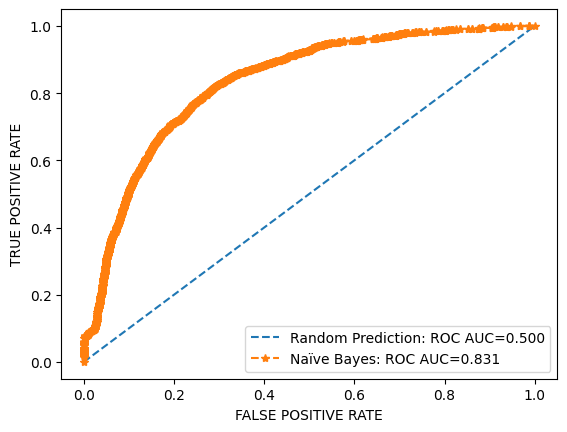

In [37]:
# Predict probabilities
nb_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


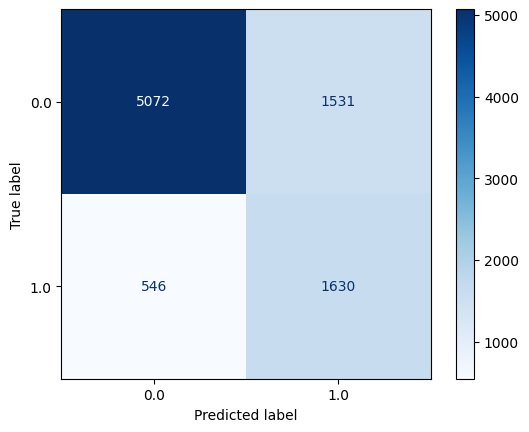

In [38]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### RANDOM FOREST

In [39]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [None, 10, 20, 30], # Depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required at each leaf node
}

# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8848741305668414


In [40]:
# Evaluate the best model obtained from Grid Search
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.8375669210616243
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      6603
         1.0       0.67      0.69      0.68      2176

    accuracy                           0.84      8779
   macro avg       0.78      0.79      0.78      8779
weighted avg       0.84      0.84      0.84      8779



Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.897


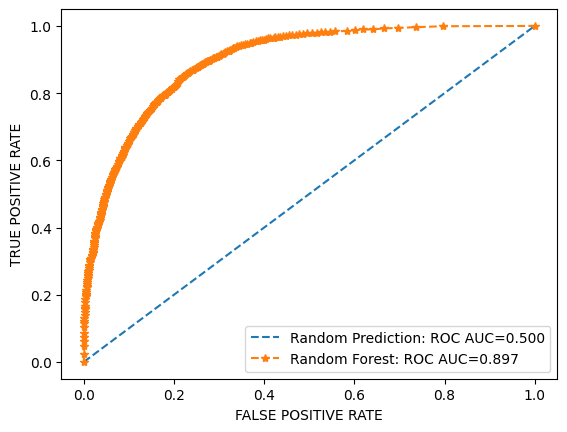

In [41]:
# Predict probabilities
rf_probs = grid_search.best_estimator_.predict_proba(X_test)
# Keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

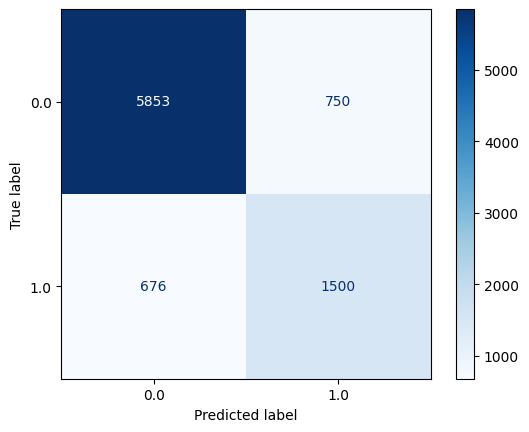

In [42]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### COMPARING THE TWO MODELS

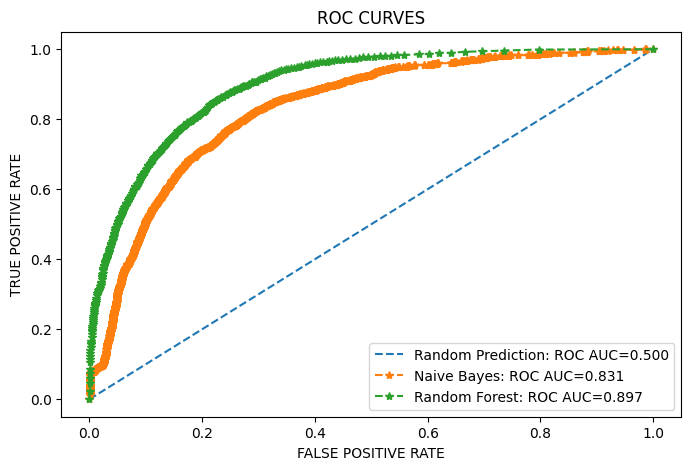

In [43]:
plt.figure(figsize=(8,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))

plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
plt.legend()
plt.show()

In [44]:
random_forest_accuracy = grid_search.score(X_test, y_test)
naïve_bayes_accuracy = model.score(X_test, y_test)

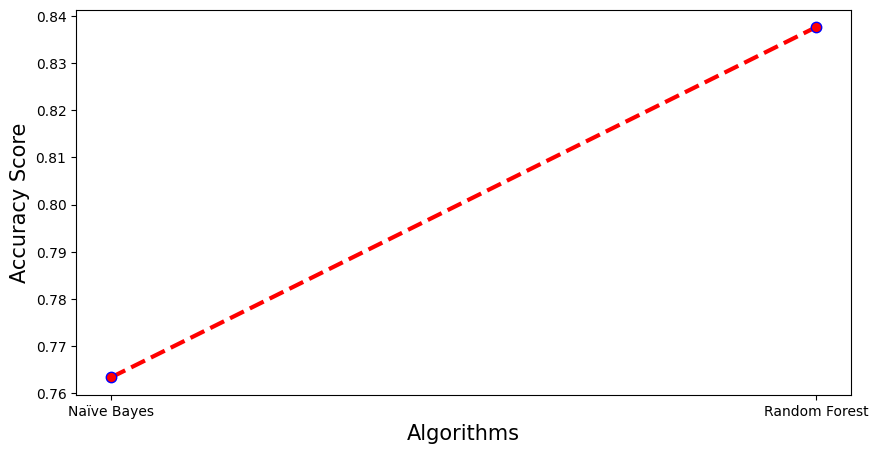

In [45]:
# Comparing Different algorithm models with their respective accuracy.
x=['Naïve Bayes','Random Forest']
y=[naïve_bayes_accuracy, random_forest_accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show() 